<h1 align="center"> Bank Marketing Campaign </h1>

Alright, so before starting anything, Let's list out my understandings from the problem statement and the intutive plan of action and the reasoning behind it.

So, with the given problem statement and data set, It is clear that this is a binary class classification problem. It is some sort of segmentation problem, where we have to find the patterns based on the features like demographic information of the records to say which particular group or which particular segment tend to buy the subscription.

## Objectives and constraints

Moving forwards, before applying any model to fit the data let's think what would be suitable for this data and the problem description. The thing is, it appears so that in the problem statement it is given that <b>Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized.</b> Hence, we need feature importance in my opinion. Because there would be judgements made based on them. Say for example we find a pattern in the data that depicts that whatever value, say out of three possible values, a categorical variable takes, there is a equal probability of the customer having bought the subscription. Then this feature is not very important to us.

Now since the constraint says that the model must give feature importance, hence we will avoid the algorithms tha work as black box and put to use only the ones that give some sort of feature importances.

Also, before any analysis, just from the experience it can also be said that a dimenstion of 20 is not very high and many variables are categorical too. Hence decision trees become a very intutive choice followed by ensemble learnig methods for a better performances.

The another thing is to present <b>the financial benefit of this project to the marketing team</b>, which is basically the again the important features, i.e. on what value to hit upon say for example, someone who's gender is female and is 25 years old and has a debt is more likely to buy the subscription.

## Performance metrics

Also, since it is a binary class classs classification problem, we may chose from a variety of performance metrics, like log-loss and AUC score

Now, let's move forward with reading the data and peroform some Exploratory data analysis

### Bunch of imports

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
data = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Data is loaded, now let's see if we can make some insights out of it with some exploratory data analytics.

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### EDA

Let's look at the correlation between the numerical features

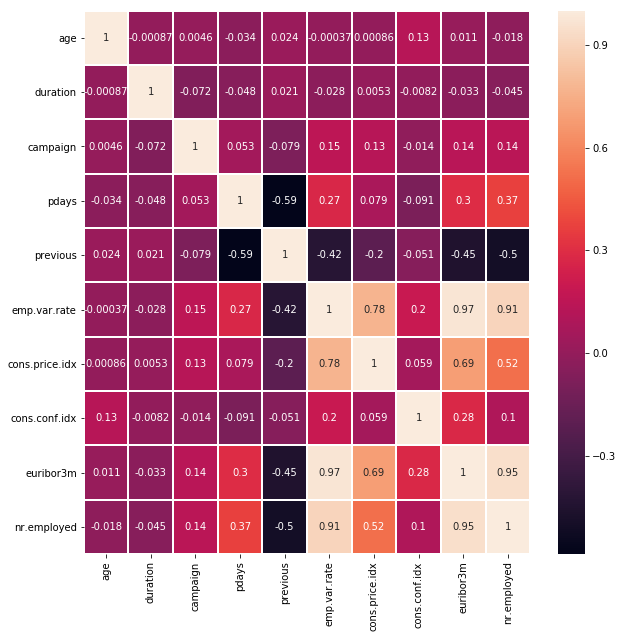

In [5]:
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_corr, annot=True, linewidths=1, ax=ax)

The highest correlation could be seen between :
* the euribor 3 month rate and employment variation rate,
* then between number of employees and euribor 3 month rate and then
* number of employees and employement variation rate. 
rest are not so significant except for
* consumer price index and employment vaiation rate, these to also have a fair amount of correlation

So the key take away is that the 'employment variance rate' feature is correlated with multiple features

let's see these 3-4 features against the true class labels

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

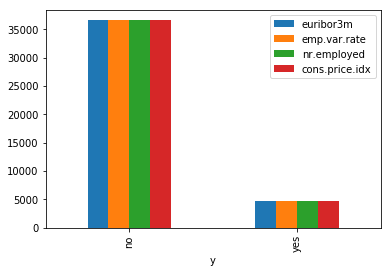

In [7]:
data.groupby('y')[['euribor3m','emp.var.rate','nr.employed','cons.price.idx']].count().plot.bar()

This shows that these features are biased towards the 'no' class

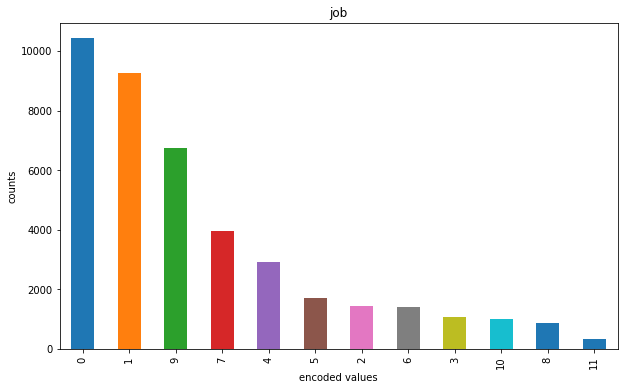

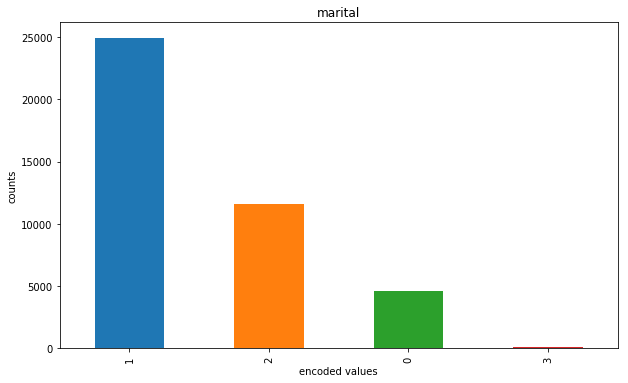

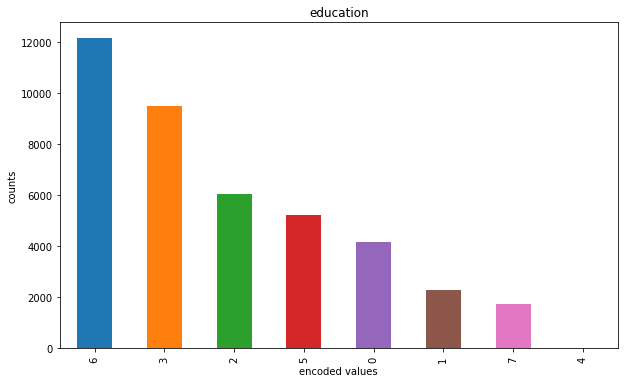

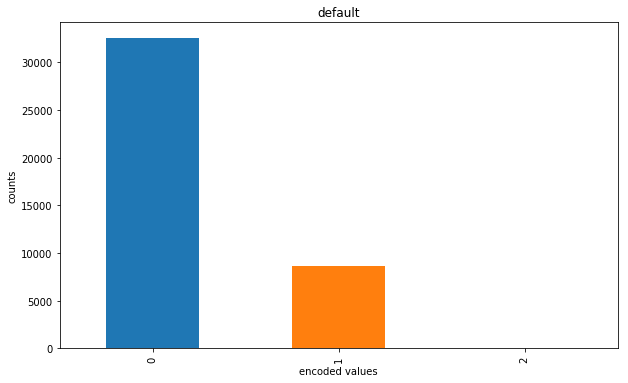

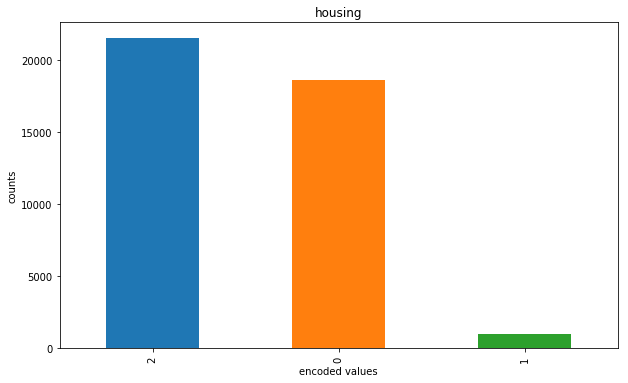

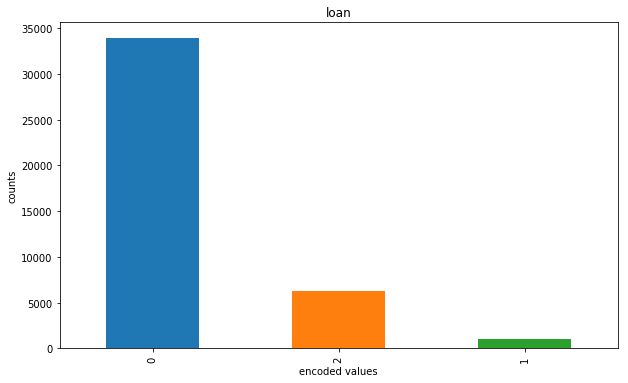

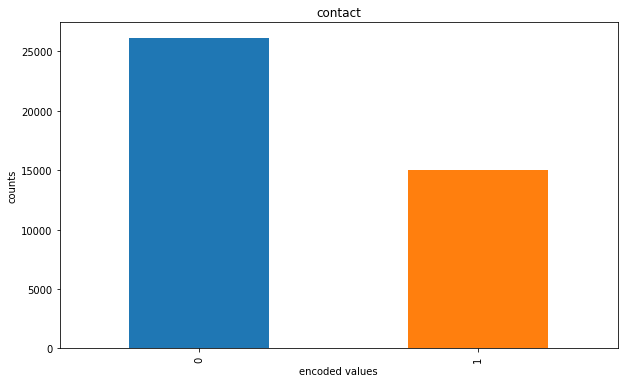

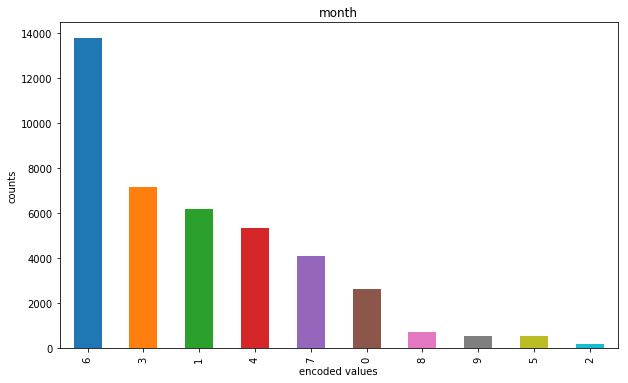

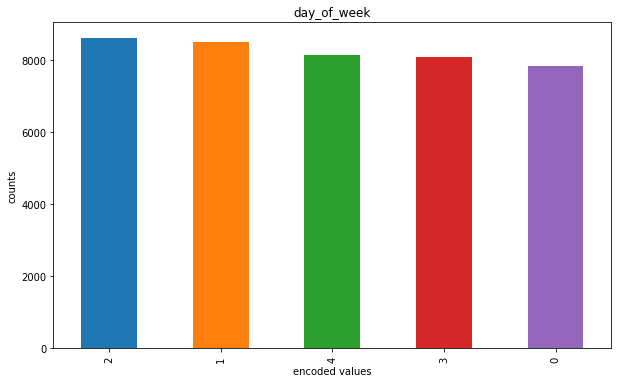

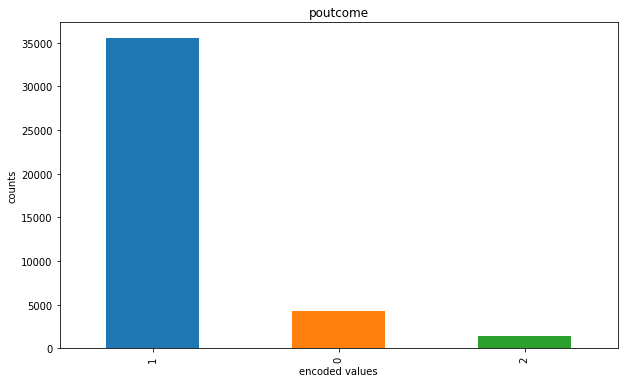

In [84]:
# visualize categorical features
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categorical:
    data[i].value_counts().plot(kind='bar',figsize = (10, 6),title=i)
    plt.xlabel('encoded values')
    plt.ylabel('counts')
    plt.show()

Let's also see the pair plots, jut to have a better idea, there are a lot of features, it's gonna be massive 10 x 10 grid

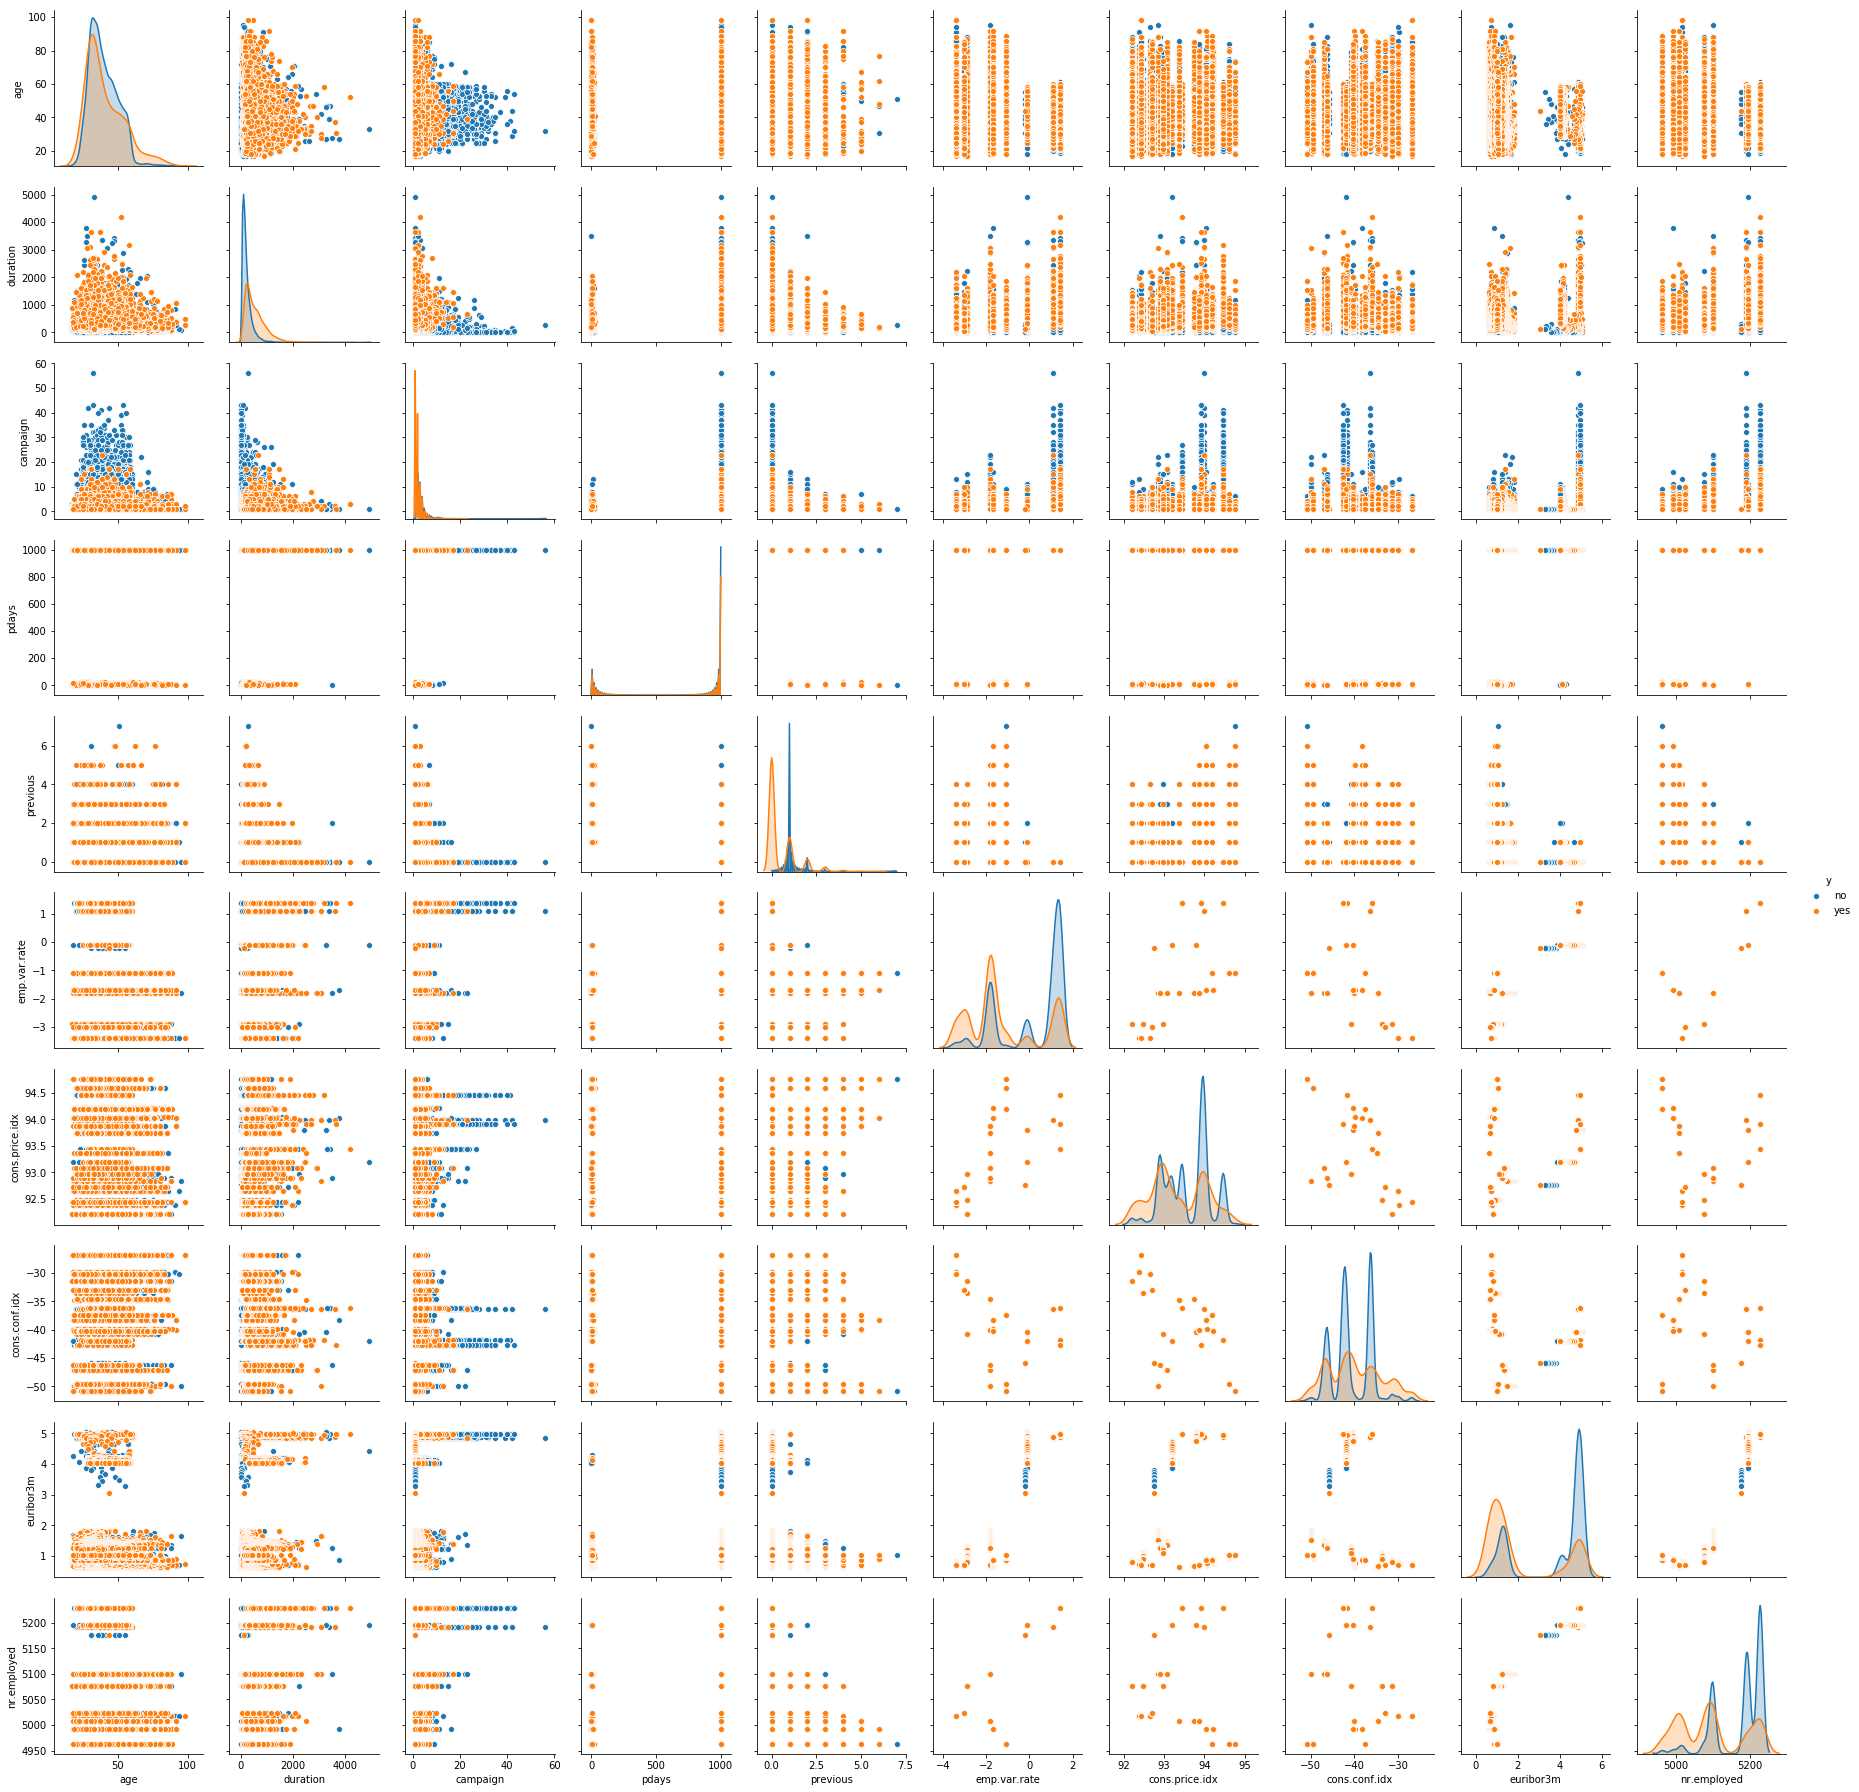

In [8]:
sns.pairplot(data, hue = 'y')

As we have discussed above that the models need to be interpretable, we shall look at some of them and also perform some hyperparameter tuning as well to see the best performance parameters

We need to encode the categorical features to put to use while modelling, let's use the the label encoder in sklearn.preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.job = label.fit_transform(data.job)
data.marital = label.fit_transform(data.marital)
data.education = label.fit_transform(data.education)
data.default = label.fit_transform(data.default)
data.housing = label.fit_transform(data.housing)
data.loan = label.fit_transform(data.loan)
data.contact = label.fit_transform(data.contact)
data.month = label.fit_transform(data.month)
data['day_of_week'] = label.fit_transform(data['day_of_week'])
data.poutcome = label.fit_transform(data.poutcome)
data.y = label.fit_transform(data.y)

One-hot-scheme encoding

In [18]:
features = data.as_matrix()
print(type(features))
print(features.shape)
target = features[:,20]
features_numeric = features[0:41188,0:20]

<class 'numpy.ndarray'>
(41188, 21)


In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat_indices = np.array([[1,2,3,4,5,6,7,8,9,14]])

enc = OneHotEncoder(categorical_features = cat_indices)
encoded_features1 = enc.fit_transform(features_numeric)

### Train-test split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(encoded_features1.todense(), target, test_size=0.4, random_state=0)

### Logistic Regression

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid = {'C' : [0.001,0.1,1,10,100], 'penalty' : ['l1','l2'], 'class_weight' : ['balanced']}
clf = LogisticRegression()
gsv = GridSearchCV(clf,grid, verbose=1, scoring='roc_auc', n_jobs=-1)
gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [32]:
best_alpha = gsv.best_params_['C']
best_class_weight = gsv.best_params_['class_weight']
best_penalty = gsv.best_params_['penalty']
print('Best params:', gsv.best_params_)
best_score = gsv.best_score_
print('Best auc score: ', best_score)

Best params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best auc score:  0.9358633044528514


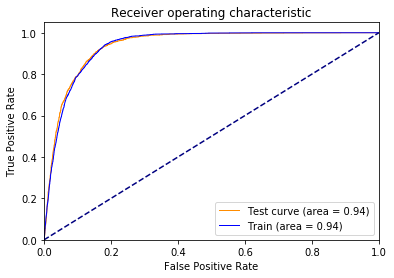

Accuracy on test set: 0.86%
Precision on test set: 0.44%
Recall on test set: 0.88%
F1 score on test set: 0.59%


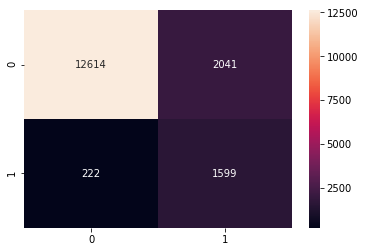

In [38]:
clf = LogisticRegression(C=best_alpha, class_weight=best_class_weight, penalty=best_penalty)
clf.fit(X_train, Y_train)
y_pred = clf.predict_proba(X_test)
y_pr = clf.predict(X_test)
y_pred_tr = clf.predict_proba(X_train)
y_pr_tr = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:,1])
fpr_tr, tpr_tr, thresholds_tr = roc_curve(Y_train, y_pred_tr[:,1])

roc_auc_te = auc(fpr, tpr)
roc_auc_tr = auc(fpr_tr, tpr_tr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Test curve (area = %0.2f)' % roc_auc_te)
plt.plot(fpr_tr, tpr_tr, color='blue', lw=1, label='Train (area = %0.2f)' % roc_auc_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ax = sns.heatmap(confusion_matrix(Y_test, y_pr), annot=True, fmt='d')

print('Accuracy on test set: %0.2f%%'%(accuracy_score(Y_test, y_pr)))
print('Precision on test set: %0.2f%%'%(precision_score(Y_test, y_pr)))
print('Recall on test set: %0.2f%%'%(recall_score(Y_test, y_pr)))
print('F1 score on test set: %0.2f%%'%(f1_score(Y_test, y_pr)))

In [ ]:
clf = SVC(kernel=best_kernel, C=best_alpha, class_weight=best_class_weight, probability=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict_proba(X_test)
y_pr = clf.predict(X_test)
y_pred_tr = clf.predict_proba(X_train)
y_pr_tr = clf.predict(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:,1])
fpr_tr, tpr_tr, thresholds_tr = roc_curve(Y_train, y_pred_tr[:,1])

roc_auc_te = auc(fpr, tpr)
roc_auc_tr = auc(fpr_tr, tpr_tr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Test curve (area = %0.2f)' % roc_auc_te)
plt.plot(fpr_tr, tpr_tr, color='blue', lw=1, label='Train (area = %0.2f)' % roc_auc_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ax = sns.heatmap(confusion_matrix(Y_test, y_pr), annot=True, fmt='d')

print('Accuracy on test set: %0.2f%%'%(accuracy_score(Y_test, y_pr)))
print('Precision on test set: %0.2f%%'%(precision_score(Y_test, y_pr)))
print('Recall on test set: %0.2f%%'%(recall_score(Y_test, y_pr)))
print('F1 score on test set: %0.2f%%'%(f1_score(Y_test, y_pr)))

## Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
grid = {'max_depth': [6,7,8], 'min_samples_leaf': [2,3],'min_samples_split': [2,3]}
clf = DecisionTreeClassifier()
gsv = GridSearchCV(clf,grid, verbose=5, scoring='roc_auc', n_jobs=-1)
gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed:    2.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    3.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [2, 3], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [42]:
best_max_depth = gsv.best_params_['max_depth']
best_min_samples_leaf = gsv.best_params_['min_samples_leaf']
best_min_samples_split = gsv.best_params_['min_samples_split']
print('Best params:', gsv.best_params_)
best_score = gsv.best_score_
print('Best auc score: ', best_score)

Best params: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best auc score:  0.9180499201931057


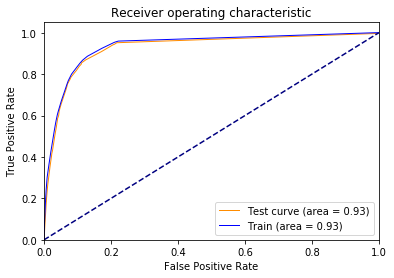

Accuracy on test set: 0.92%
Precision on test set: 0.65%
Recall on test set: 0.55%
F1 score on test set: 0.59%


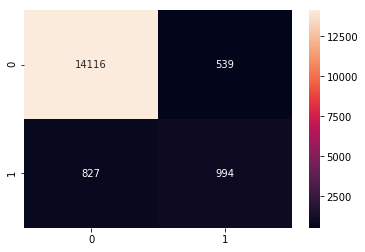

In [43]:
clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
clf.fit(X_train, Y_train)
y_pred = clf.predict_proba(X_test)
y_pr = clf.predict(X_test)
y_pred_tr = clf.predict_proba(X_train)
y_pr_tr = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:,1])
fpr_tr, tpr_tr, thresholds_tr = roc_curve(Y_train, y_pred_tr[:,1])

roc_auc_te = auc(fpr, tpr)
roc_auc_tr = auc(fpr_tr, tpr_tr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Test curve (area = %0.2f)' % roc_auc_te)
plt.plot(fpr_tr, tpr_tr, color='blue', lw=1, label='Train (area = %0.2f)' % roc_auc_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ax = sns.heatmap(confusion_matrix(Y_test, y_pr), annot=True, fmt='d')

print('Accuracy on test set: %0.2f%%'%(accuracy_score(Y_test, y_pr)))
print('Precision on test set: %0.2f%%'%(precision_score(Y_test, y_pr)))
print('Recall on test set: %0.2f%%'%(recall_score(Y_test, y_pr)))
print('F1 score on test set: %0.2f%%'%(f1_score(Y_test, y_pr)))

In [50]:
from sklearn.tree import export_graphviz
import os
export_graphviz(clf, out_file='tree1.dot', filled=True, max_depth=3)
os.system('dot -Tpng tree.dot -o tree.png')

1

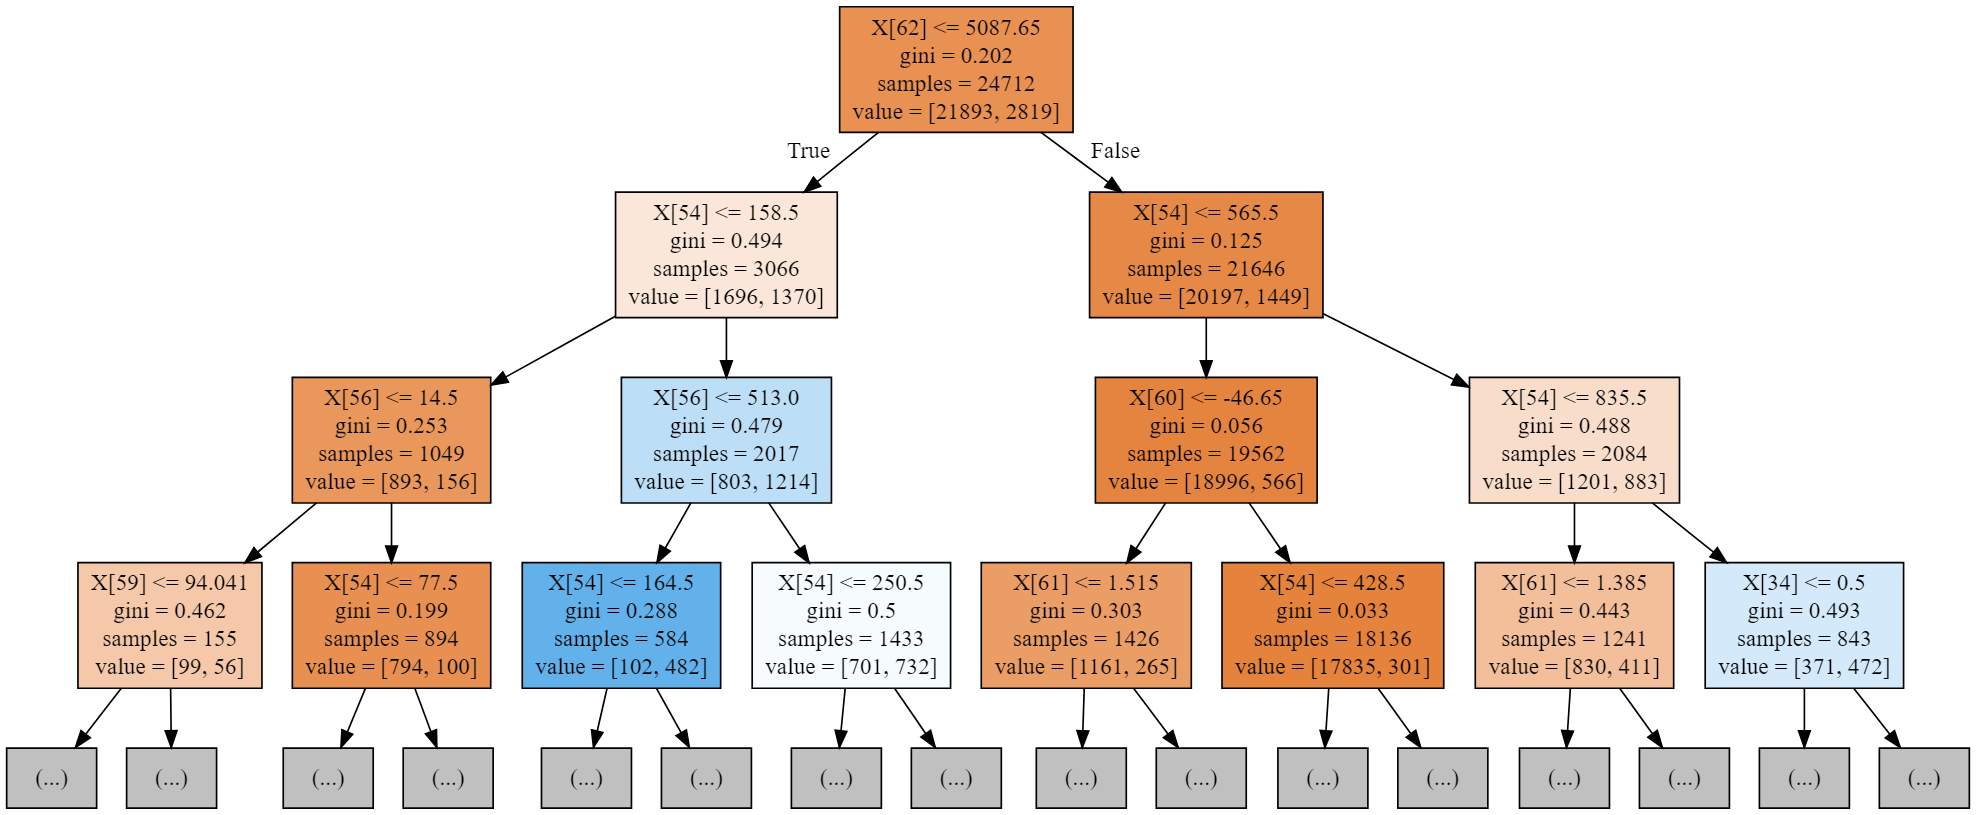

In [51]:
from IPython.display import Image
Image('graphviz.png')

## It isn't comprehendable, let's just use a few features to create and visualize another decision tree

Accuracy on test set: 0.90%
Precision on test set: 0.68%
Recall on test set: 0.22%
F1 score on test set: 0.33%


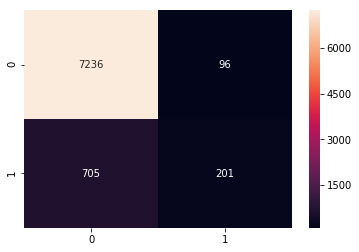

In [80]:
# https://github.com/patelkhelan11/ALDAproject/blob/master/dheeraj_decisiontree.py
from sklearn.preprocessing import LabelEncoder
columns_you_want = ['emp.var.rate', 'duration', 'month', 'euribor3m', 'nr.employed', 'pdays', 'poutcome']
end_column = ['y']

le = LabelEncoder()

le.fit(data['poutcome'])
data['poutcome']=le.transform(data['poutcome'])

le.fit(data['housing'])
data['housing']=le.transform(data['housing'])

le.fit(data['month'])
data['month']=le.transform(data['month'])

le.fit(data['y'])
data['y']=le.transform(data['y'])

bins = [0, 2, 4,6]
data['euribor3m'] = np.digitize(data['euribor3m'], bins)

bins = [0, 10, 20,30,999] 
data['pdays'] = np.digitize(data['pdays'], bins)

bins = [-4, -3, -2,-1,0,1,2] 
data['emp.var.rate'] = np.digitize(data['emp.var.rate'], bins)

bins = [0,100,200,300,400,500,600,1000,1500,2000,2500,3000,3500,4000,4500,5000]
data['duration'] = np.digitize(data['duration'], bins)

bins = [4900, 5000, 5100, 5200, 5300, 5400] 
data['nr.employed'] = np.digitize(data['nr.employed'], bins)

training_df = data.sample(frac = 0.8, replace = False)
test_df = data.drop(training_df.index)

train_df =  training_df[columns_you_want]
training_Predict_Df = training_df[end_column]

testing_df =  test_df[columns_you_want]
testing_predict_alreadygiven = test_df[end_column]

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=2000, random_state=1, splitter = "random" )
clf = clf.fit(train_df, training_Predict_Df)

# Entropy based Decision Tree building

clf_entropy = DecisionTreeClassifier(min_samples_split=2000, random_state=1, criterion='entropy' , splitter = "random")
clf_entropy = clf_entropy.fit(train_df, training_Predict_Df)

y_pr = clf_entropy.predict(testing_df)

ax = sns.heatmap(confusion_matrix(testing_predict_alreadygiven, y_pr), annot=True, fmt='d')

print('Accuracy on test set: %0.2f%%'%(accuracy_score(testing_predict_alreadygiven, y_pr)))
print('Precision on test set: %0.2f%%'%(precision_score(testing_predict_alreadygiven, y_pr)))
print('Recall on test set: %0.2f%%'%(recall_score(testing_predict_alreadygiven, y_pr)))
print('F1 score on test set: %0.2f%%'%(f1_score(testing_predict_alreadygiven, y_pr)))


export_graphviz(clf_entropy, out_file='tree1.dot', filled=True, feature_names = columns_you_want)

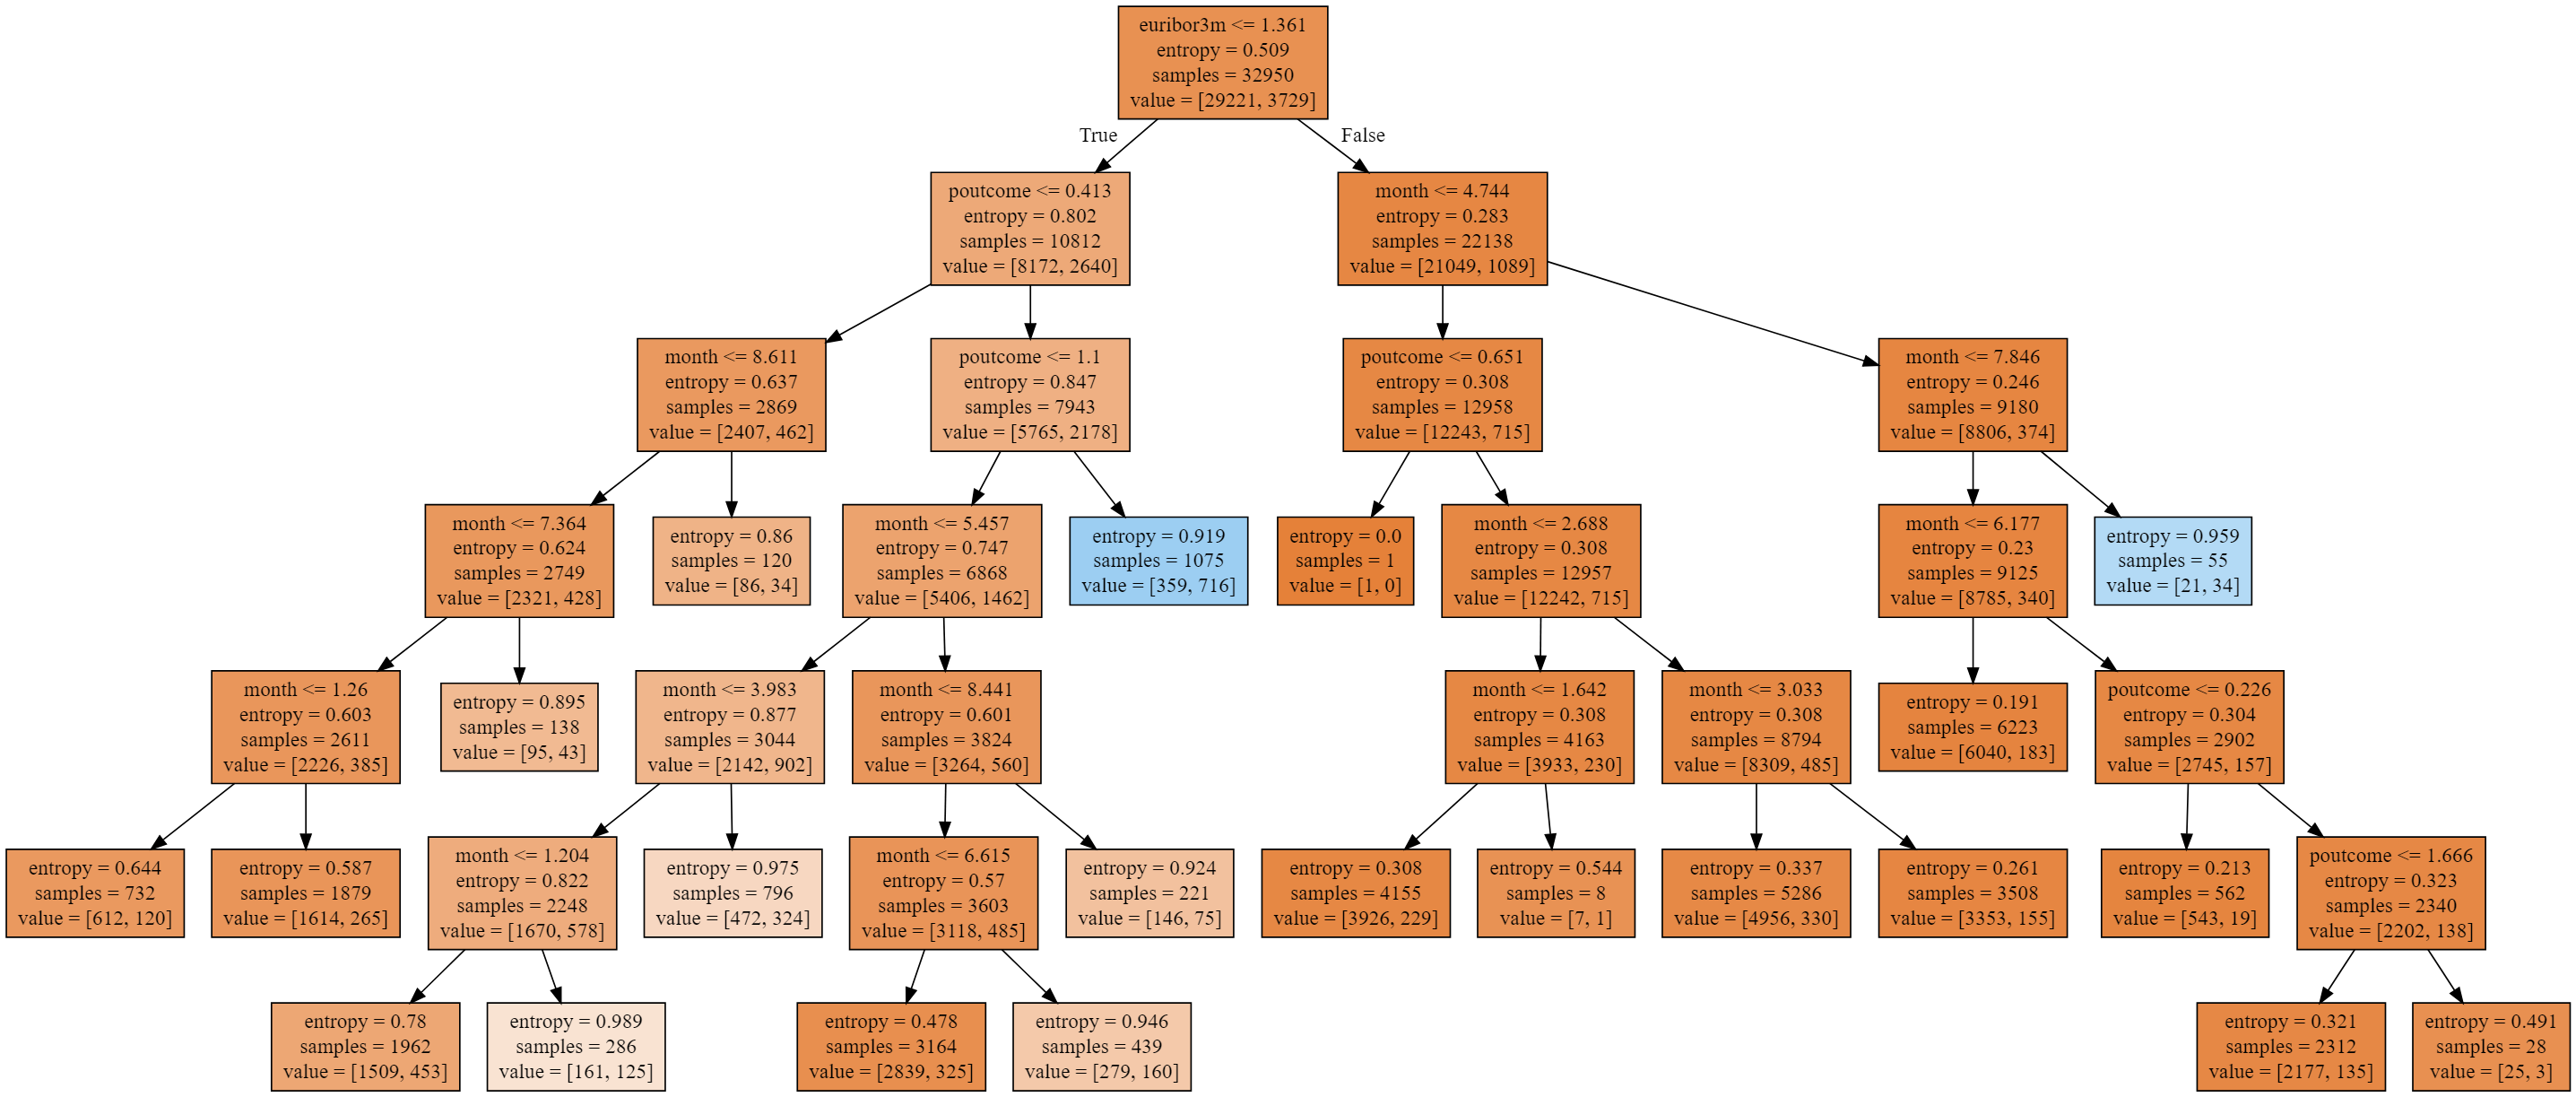

In [73]:
Image('graphviz_2.png')

## Now let's finally go to the Ensemble methods (just Random Forest)

In [76]:
grid = [{'n_estimators' : [50, 100, 250, 500, 1000]}]
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
gsv = GridSearchCV(clf, grid, verbose=2, scoring='roc_auc', n_jobs=-1)
gsv.fit(X_train,Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   10.4s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   24.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [50, 100, 250, 500, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [77]:
print('Best alpha: ', gsv.best_params_)
print('Best score with the above alpha: ', gsv.best_score_)

Best alpha:  {'n_estimators': 1000}
Best score with the above alpha:  0.9374939499713673


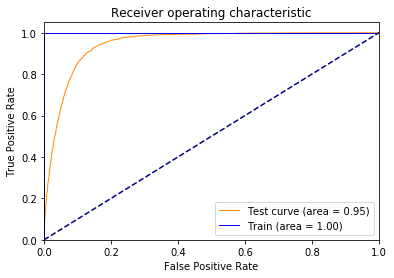

Accuracy on test set: 0.91%
Precision on test set: 0.67%
Recall on test set: 0.45%
F1 score on test set: 0.54%


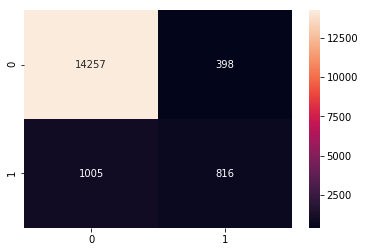

In [78]:
clf = RandomForestClassifier(n_estimators=gsv.best_params_['n_estimators'])
clf.fit(X_train, Y_train)
y_pred = clf.predict_proba(X_test)
y_pr = clf.predict(X_test)
y_pred_tr = clf.predict_proba(X_train)
y_pr_tr = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:,1])
fpr_tr, tpr_tr, thresholds_tr = roc_curve(Y_train, y_pred_tr[:,1])

roc_auc_te = auc(fpr, tpr)
roc_auc_tr = auc(fpr_tr, tpr_tr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Test curve (area = %0.2f)' % roc_auc_te)
plt.plot(fpr_tr, tpr_tr, color='blue', lw=1, label='Train (area = %0.2f)' % roc_auc_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ax = sns.heatmap(confusion_matrix(Y_test, y_pr), annot=True, fmt='d')

print('Accuracy on test set: %0.2f%%'%(accuracy_score(Y_test, y_pr)))
print('Precision on test set: %0.2f%%'%(precision_score(Y_test, y_pr)))
print('Recall on test set: %0.2f%%'%(recall_score(Y_test, y_pr)))
print('F1 score on test set: %0.2f%%'%(f1_score(Y_test, y_pr)))

## Conclusions

So above are the results from the simple models we tried for this partiular classification task.

The decision tree was intutive and the one that we built using only the categorical freatures seems good enough to give an accuracy of 90%. Now, this decision tree fulfills the objective, a strategy that provides financial incentives to the bank. But since the data set is imbalanced we just cant go with accuracy as the only metric.
 Rest results are tabulated below

In [81]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model','Accuracy','AUC score', 'F1 score','Precision', 'Recall']
x.add_row(['Logistic regression', 0.86, 0.94, 0.44, 0.88, 0.59])
x.add_row(['Decision Trees', 0.92, 0.93, 0.65, 0.55, 0.59])
x.add_row(['Logistic regression', 0.91, 0.95, 0.67, 0.45, 0.54])

print(x)

+---------------------+----------+-----------+----------+-----------+--------+
|        Model        | Accuracy | AUC score | F1 score | Precision | Recall |
+---------------------+----------+-----------+----------+-----------+--------+
| Logistic regression |   0.86   |    0.94   |   0.44   |    0.88   |  0.59  |
|    Decision Trees   |   0.92   |    0.93   |   0.65   |    0.55   |  0.59  |
| Logistic regression |   0.91   |    0.95   |   0.67   |    0.45   |  0.54  |
+---------------------+----------+-----------+----------+-----------+--------+


The Random forest has an AUC score of 1.00 that might just be an indication to overfiting.